# OSI-SAF

imports

In [1]:
import xarray as xr
import intake

Open the catalogue and access the data at once

In [3]:
cat = intake.open_catalog('https://raw.githubusercontent.com/eerie-project/intake_catalogues/main/eerie.yaml')\
                          ['dkrz']['disk']['observations']

In [4]:
osisaf = cat['OSI-SAF']['osi-450']#['imerg']#['ebaf-toa42']#['woa18_2005_2017']
print(list(osisaf))

['nh-daily', 'nh-monthly', 'sh-daily', 'sh-monthly']


In [4]:
data=osisaf['nh-daily'].to_dask()

In [5]:
data

<xarray.Dataset>
Dimensions:                   (time: 11801, bnds: 2, yc: 432, xc: 432)
Coordinates:
  * time                      (time) datetime64[ns] 1979-01-02T12:00:00 ... 2...
    lon                       (yc, xc) float32 dask.array<chunksize=(432, 432), meta=np.ndarray>
    lat                       (yc, xc) float32 dask.array<chunksize=(432, 432), meta=np.ndarray>
  * xc                        (xc) float64 -5.388e+03 -5.362e+03 ... 5.388e+03
  * yc                        (yc) float64 5.388e+03 5.362e+03 ... -5.388e+03
Dimensions without coordinates: bnds
Data variables:
    time_bnds                 (time, bnds) datetime64[ns] dask.array<chunksize=(179, 2), meta=np.ndarray>
    Lambert_Azimuthal_Grid    (time) int32 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    ice_conc                  (time, yc, xc) float64 dask.array<chunksize=(179, 432, 432), meta=np.ndarray>
    raw_ice_conc_values       (time, yc, xc) float64 dask.array<chunksize=(179, 432, 432), meta=np.ndarray>
    total_standard_error      (time, yc, xc) float64 dask.array<chunksize=(179, 432, 432), meta=np.ndarray>
    smearing_standard_error   (time, yc, xc) float64 dask.array<chunksize=(179, 432, 432), meta=np.ndarray>
    algorithm_standard_error  (time, yc, xc) float64 dask.array<chunksize=(179, 432, 432), meta=np.ndarray>
    status_flag               (time, yc, xc) float32 dask.array<chunksize=(179, 432, 432), meta=np.ndarray>
Attributes: (12/42)
    CDI:                       Climate Data Interface version 2.0.6 (https://...
    source:                    FCDR of SMMR / SSMI / SSMIS Brightness Tempera...
    institution:               OSISAF - EUMETSAT
    Conventions:               CF-1.6 ACDD-1.3
    title:                     Sea Ice Concentration Climate Data Record from...
    summary:                   This climate data record of sea ice concentrat...
    ...                        ...
    tracking_id:               da2d2be2-4ba9-4a0e-aa3d-95ae9a395a4a
    naming_authority:          int.eumetsat
    standard_name_vocabulary:  CF Standard Name Table (v36, 21 September 2016)
    id:                        10.15770/EUM_SAF_OSI_0008
    product_version:           2.0
    CDO:                       Climate Data Operators version 2.0.6 (https://...

In [5]:
data['ice_conc']

<xarray.DataArray 'ice_conc' (time: 11801, yc: 432, xc: 432)>
dask.array<concatenate, shape=(11801, 432, 432), dtype=float64, chunksize=(366, 432, 432), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1979-01-02T12:00:00 ... 2015-12-31T12:00:00
    lon      (yc, xc) float32 dask.array<chunksize=(432, 432), meta=np.ndarray>
    lat      (yc, xc) float32 dask.array<chunksize=(432, 432), meta=np.ndarray>
  * xc       (xc) float64 -5.388e+03 -5.362e+03 ... 5.362e+03 5.388e+03
  * yc       (yc) float64 5.388e+03 5.362e+03 ... -5.362e+03 -5.388e+03
Attributes:
    standard_name:        sea_ice_area_fraction
    long_name:            fully filtered concentration of sea ice using atmos...
    units:                %
    grid_mapping:         Lambert_Azimuthal_Grid
    ancillary_variables:  total_standard_error status_flag
    comment:              this field is the primary sea ice concentration est...

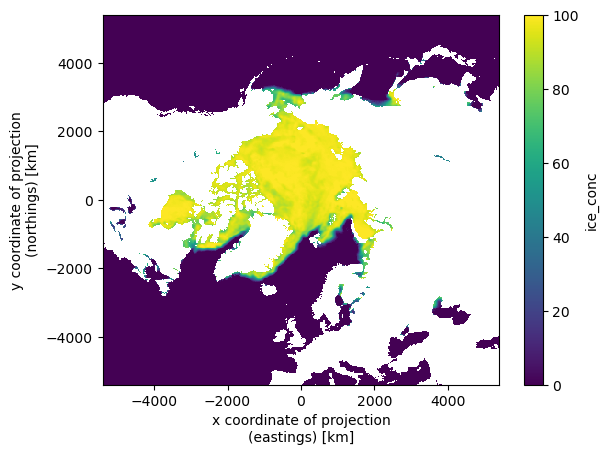

In [6]:
data['ice_conc'].sel(time=slice('2010-01-01', '2010-01-05')).mean(dim='time').plot()

In [7]:
mean = data['ice_conc'].sel(time=slice('2010', '2020')).mean(dim='time').compute()

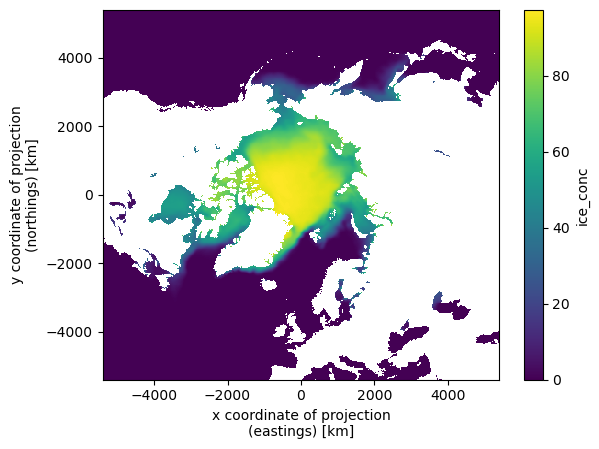

In [8]:
mean.plot()